In [17]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [18]:
data = pd.read_csv("data/Mall_Customers.csv")
data.columns = ["customer_id", "gender", "age", "annual_income", "spending_score"]
data.head(n=2)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [19]:
dat = ff.create_table(data.head())
py.iplot(dat)

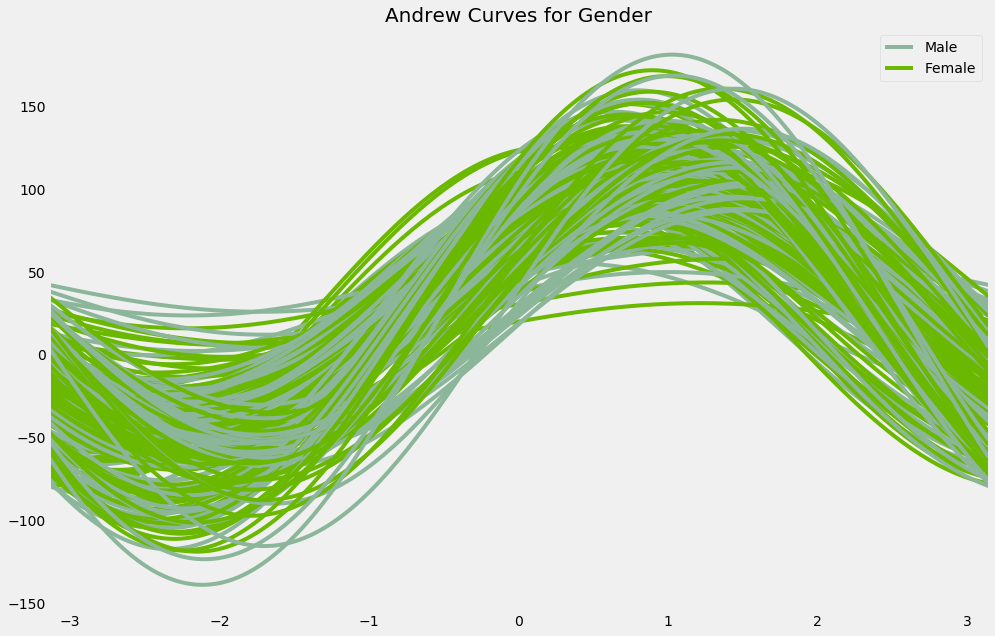

In [23]:
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(data.drop("customer_id", axis=1), "gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

Этот график показывает, что `Andrew Curves` могут сохранять средние значения, расстояние (с точностью до константы) и дисперсии. Это означает, что `Andrew Curves`, представленные функциями, близкими друг к другу, предполагают, что соответствующие точки данных также будут близко друг к другу.

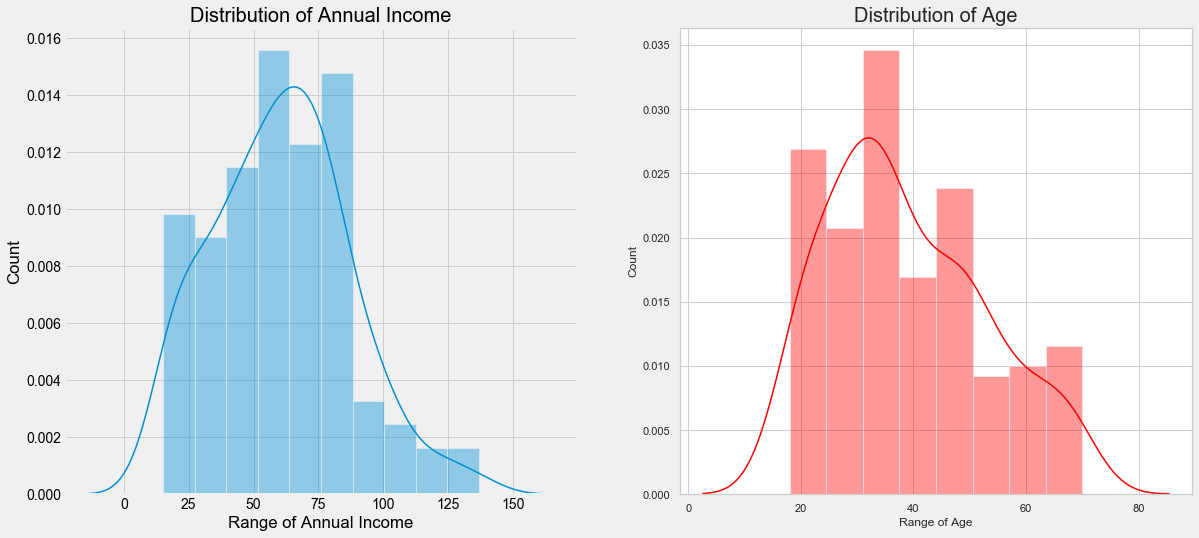

In [24]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['annual_income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Здесь, на графиках выше, мы можем увидеть гистограммы распределения годового дохода и возраста. Посмотрев на графики, мы можем сделать вывод, что мало людей, которые зарабатывают более 100 долларов США. Большинство людей зарабатывают около 50-75 долларов США. Также мы можем сказать, что наименьший доход составляет около 20 долларов США. В то же время, самыми постоянными посетителями ТРЦ являются люди в возрасте от 30 до 35 лет. А вот люди старшего возраста - наименее частые посетители ТЦ.

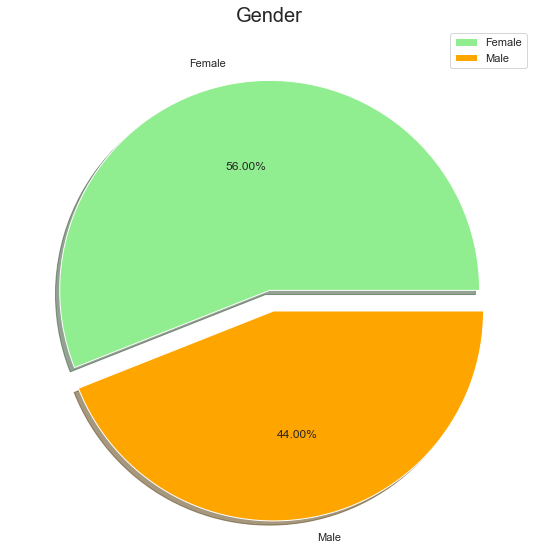

In [27]:
labels = ['Female', 'Male']
size = data['gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Рассмотрим приведенную выше круговую диаграмму, которая показывает распределение полов посетителей ТРЦ.
Интересно, что женщины лидируют с долей 56%, тогда как у мужчин доля 44%, это огромный разрыв, особенно когда популяция мужчин сравнительно выше, чем женщин.

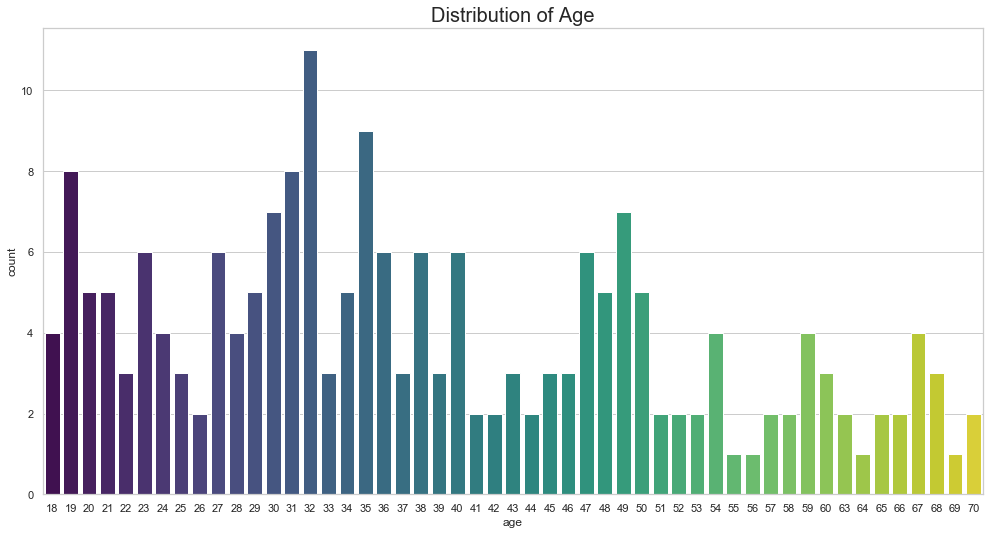

In [29]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['age'], palette = 'viridis')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Этот график показывает более интерактивную диаграмму распределения каждой возрастной группы для более четкого определения возрастной группы посетителей в торговом центре. Глядя на приведенный выше график, можно увидеть, что возраст от 27 до 39 лет очень распространен, но нет четкой закономерности, мы можем найти только некоторые групповые модели, такие как старшие возрастные группы реже посещают ТРЦ, по сравнению с молодой группой посетитителей или посетитилеями среднего возраста. Интересный факт, люди в возрасте 55, 56, 69, 64 лет очень редко посещают торговые центры. Люди в возрасте 32 лет - самые частые посетители торгового центра.

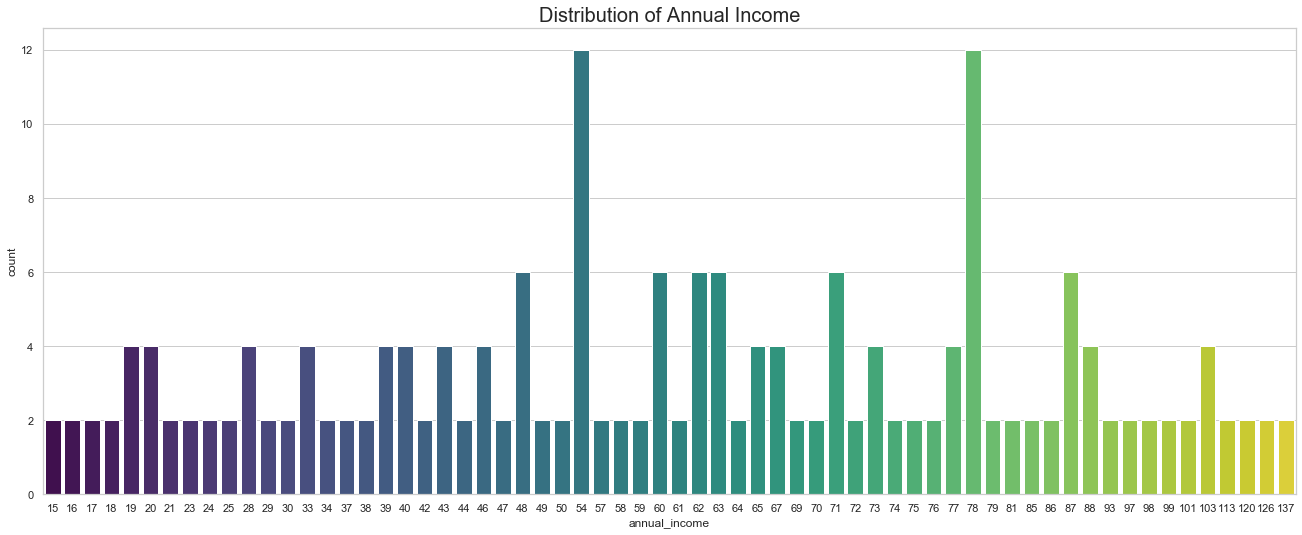

In [30]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['annual_income'], palette = 'viridis')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Опять же, это детальная гистограмма, чтобы лучше объяснить распределение каждого уровня дохода. Интересно, что в торговом центре есть клиенты с очень сопоставимой частотой с их годовым доходом в диапазоне от 15 долларов США до 137 тысяч долларов США. В торговом центре больше клиентов, чей годовой доход составляет 54 тыс. Долларов США или 78 долларов США.

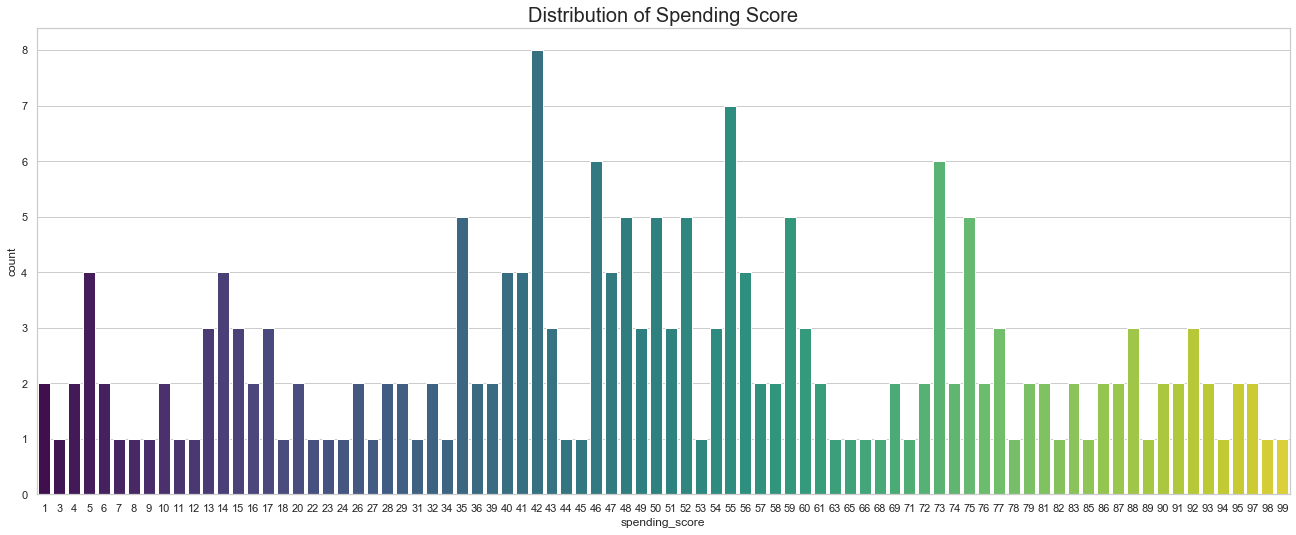

In [33]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['spending_score'], palette = 'viridis')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

Это самая важная гистограмма с точки зрения торгового центра, так как очень важно иметь некоторую интуицию и представление о рейтинге расходов клиентов, посещающих торговый центр. В целом можно сделать вывод, что у большинства клиентов оценка расходов находится в диапазоне 35-60. Интересно, что есть клиенты, у которых оценка расходов очень низкая, а также оценка расходов 99, что показывает, что торговый центр обслуживает множество клиентов с различными потребностями и требованиями, доступными в торговом центре.

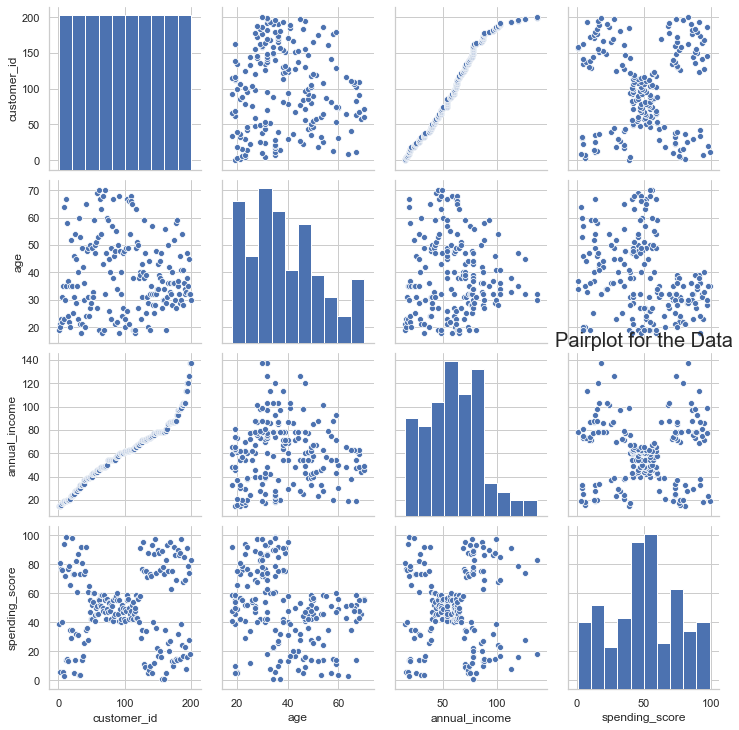

In [34]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

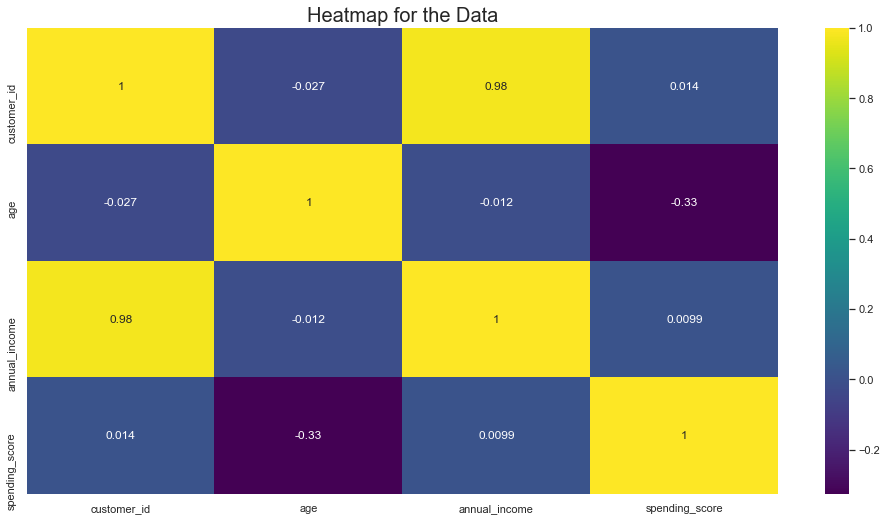

In [35]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Приведенный выше график для отображения корреляции между различными атрибутами набора данных сегментации клиентов торгового центра. Эта тепловая карта отражает наиболее коррелированные признаками желтым цветом и наименее коррелированные функции фиолетовым цветом. Мы ясно видим, что эти атрибуты не имеют хорошей корреляции между собой, поэтому мы продолжим работу со всеми функциями.

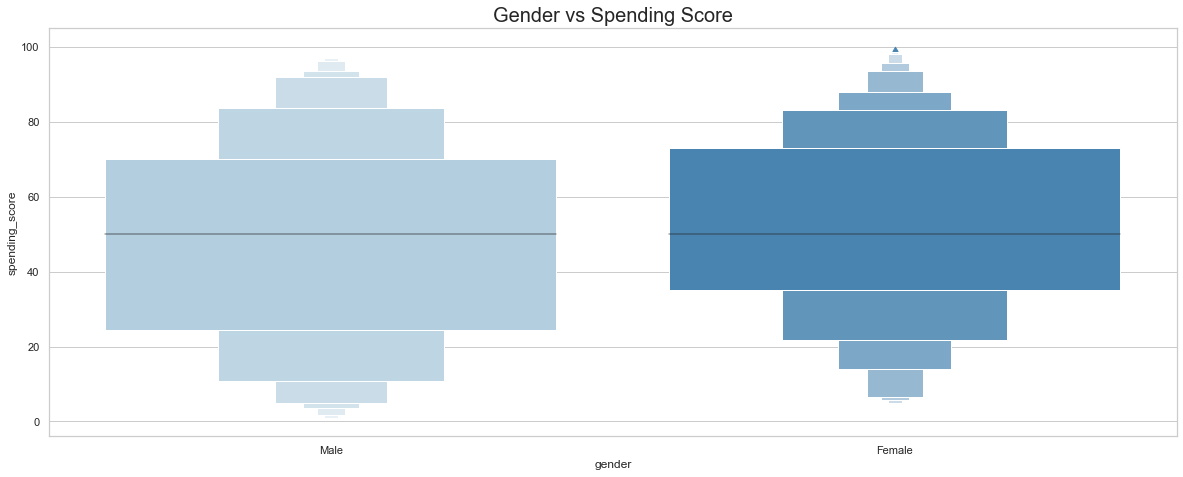

In [37]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['gender'], data['spending_score'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Двухфакторный анализ между полом и оценкой расходов: хорошо видно, что у большинства мужчин показатель расходов составляет от 25 000 до 70 000 долларов США, тогда как у женщин показатель расходов составляет от 35 000 до 75 000 долларов США. что еще раз указывает на то, что женщины - более склонные к покупкам клиенты.

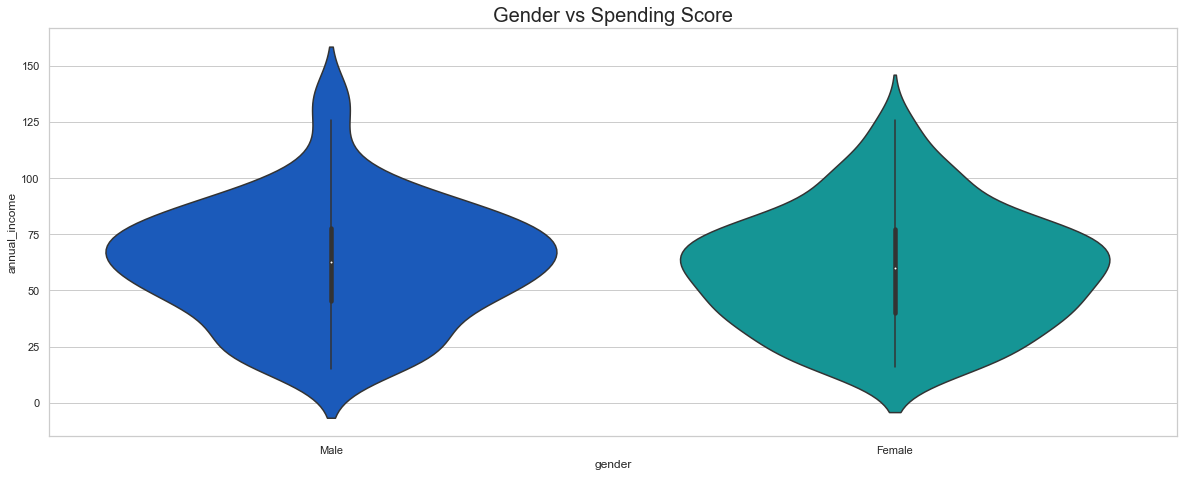

In [42]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['gender'], data['annual_income'], palette = 'winter')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Вновь делаем двухфакторный анализ: между полом и годовым доходом, чтобы лучше визуализировать доход разных полов.

Мужчин, зарабатывающих больше, чем женщин, больше. Но количество мужчин и женщин с низким годовым доходом, совпадает.

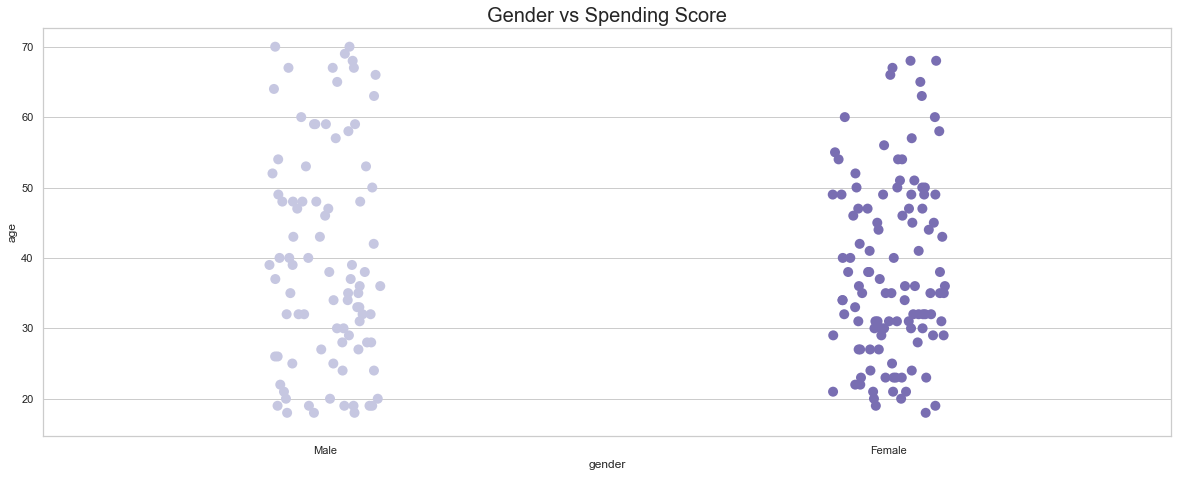

In [44]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['gender'], data['age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

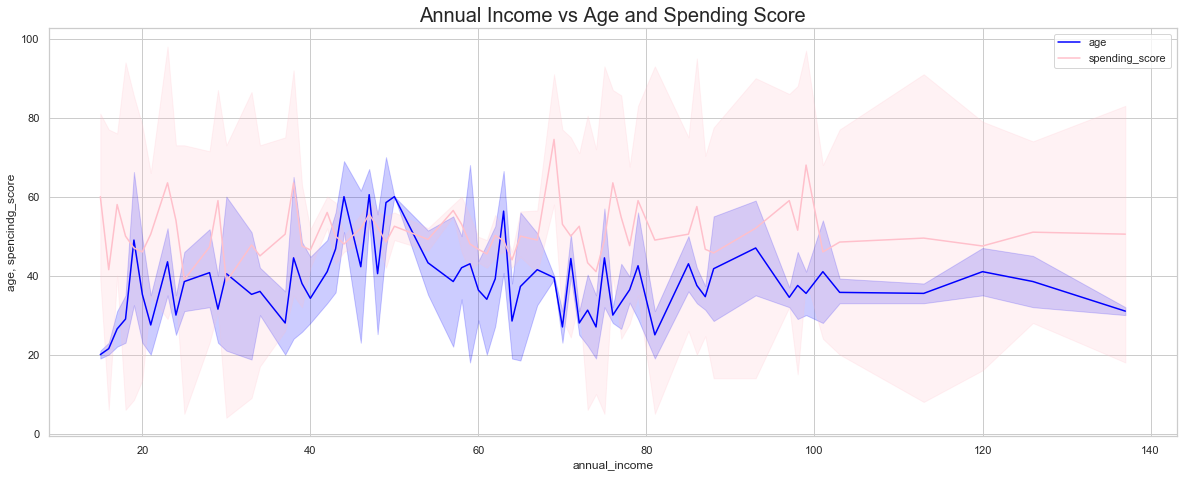

In [46]:
x = data['annual_income']
y = data['age']
z = data['spending_score']

sns.lineplot(x, y, color = 'blue', label="age")
sns.lineplot(x, z, color = 'pink', label="spending_score")
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.ylabel("age, spencindg_score")
plt.legend(loc="best")
plt.show()

Вышеупомянутый график для оценки силы связи между годовым доходом и возрастом представлен синей линией, а график между годовым доходом и показателем расходов представлен розовым цветом. показывает, как возраст и расходы зависят от годового дохода.

## Кластерный анализ

In [47]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


## KMeans

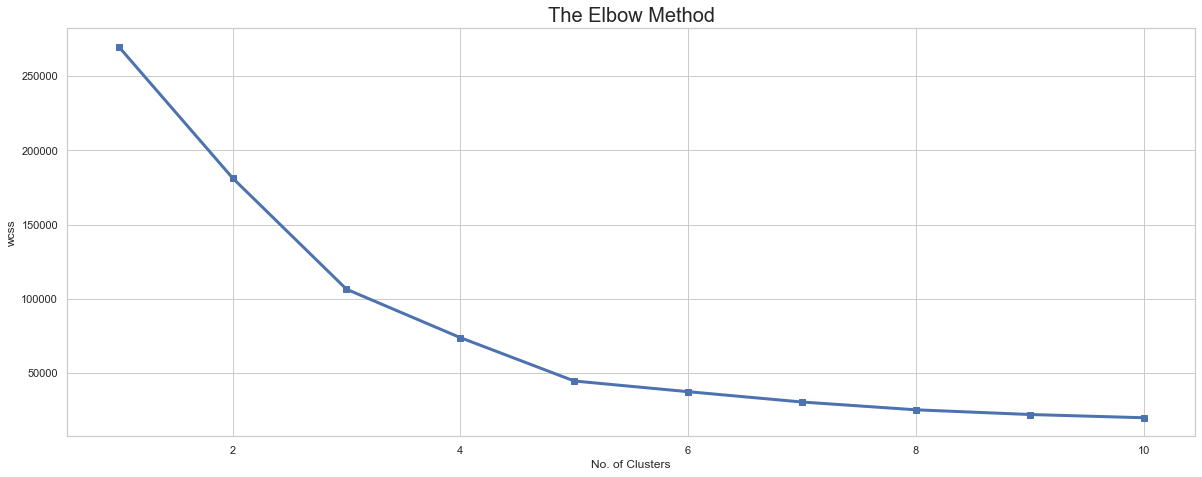

In [49]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=3, marker="s")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

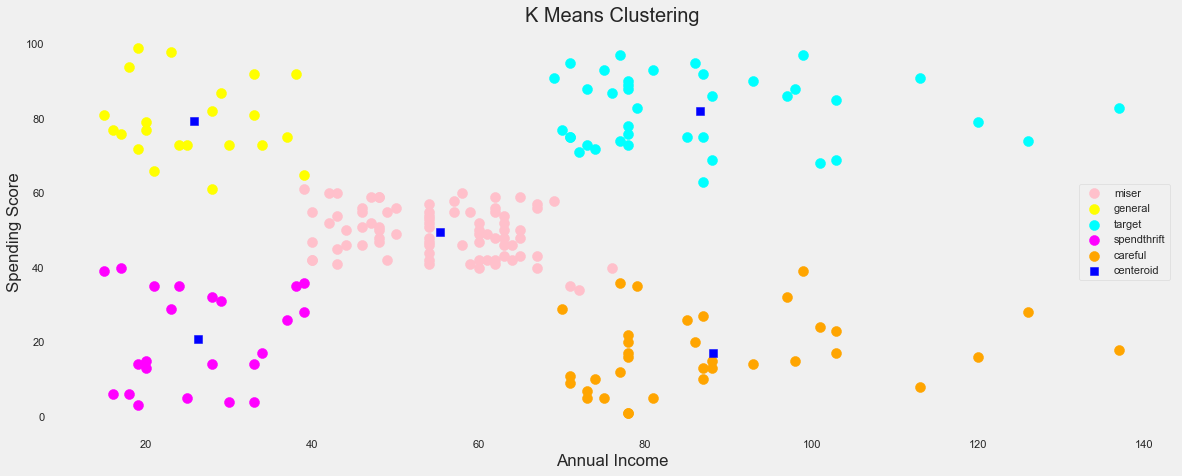

In [51]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker="s", s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Этот способ кластерного анализа дает нам очень четкое представление о различных сегментах клиентов торгового центра. Очевидно, что существует пять сегментов клиентов: скупой, типичный, целевой, экономный, осторожный, на основе их годового дохода и показателя расходов, которые, как сообщается, являются лучшими факторами / атрибутами для определения сегментов клиента в торговом центре.

## Иерархическая кластеризация

Иерархическая кластеризация, также известная как иерархический кластерный анализ, представляет собой алгоритм, который группирует похожие объекты в группы, называемые кластерами. Конечная точка - это набор кластеров, где каждый кластер отличается от другого кластера, а объекты в каждом кластере в целом похожи друг на друга.

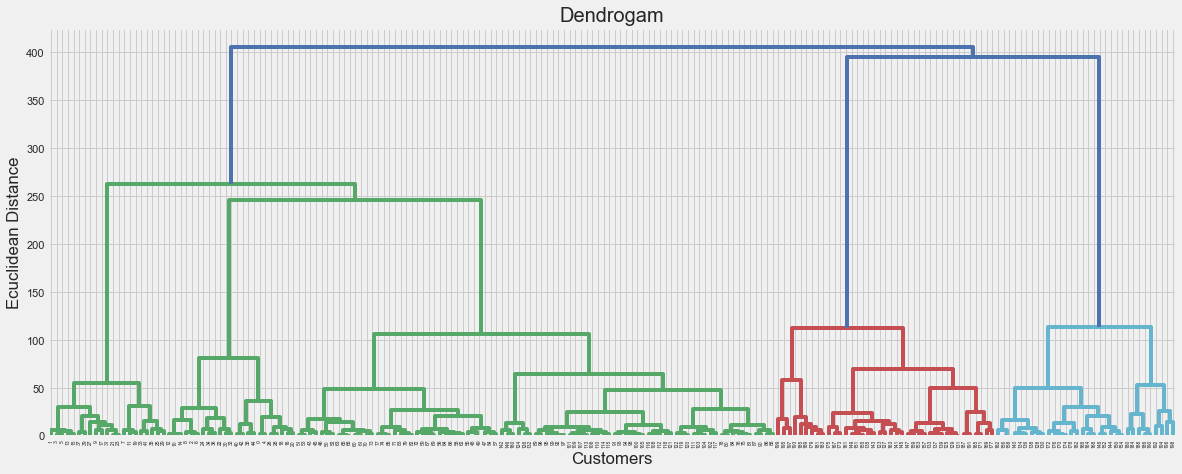

In [52]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.xlabel('Customers')
plt.show()

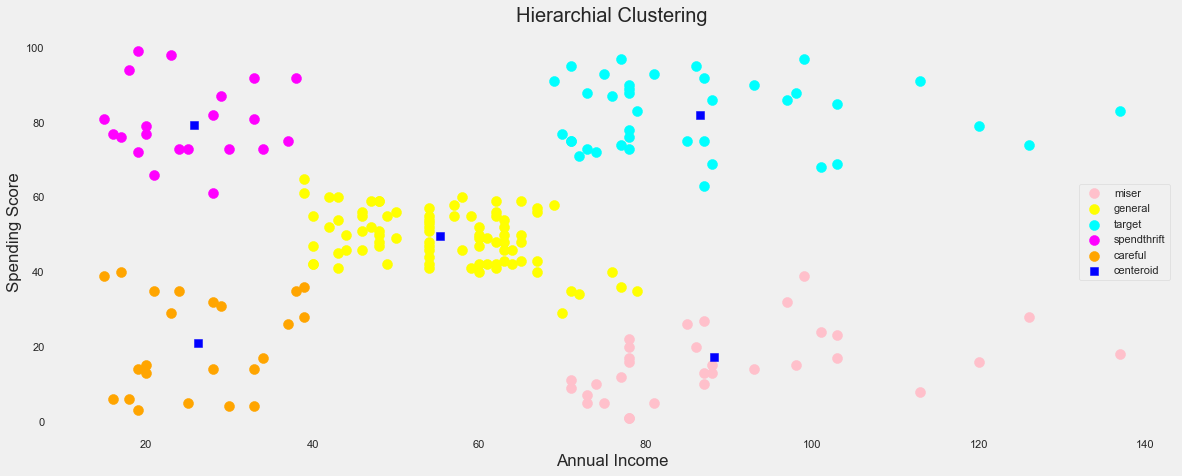

In [54]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker="s", s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## Кластеризация на основе возраста

In [55]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

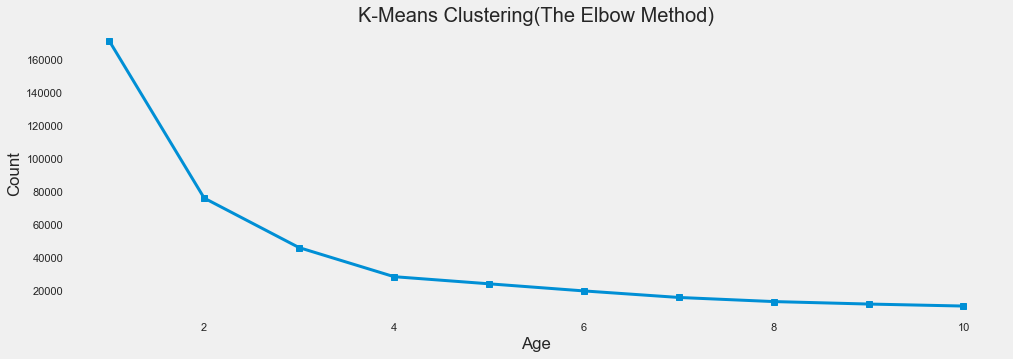

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss, linewidth=3, marker="s")
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

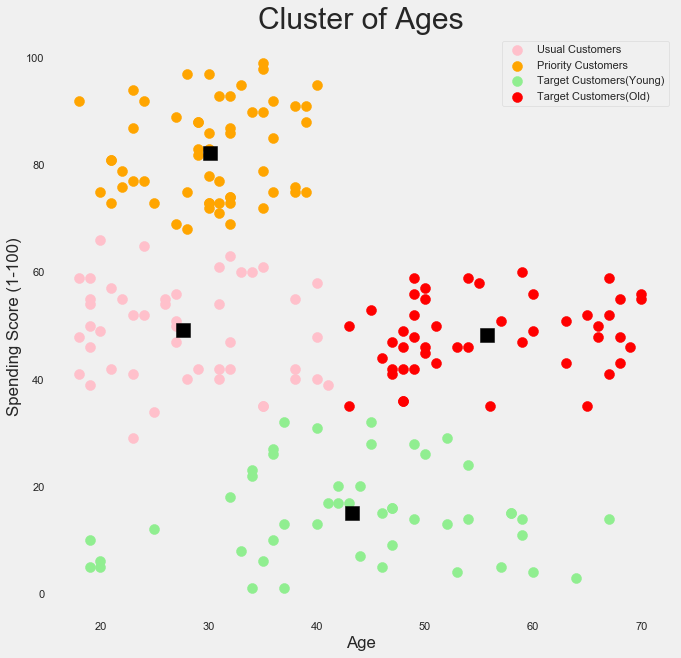

In [60]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="s", s = 200, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Согласно моей собственной интуиции, глядя на приведенный выше график кластеризации между возрастом клиентов и их соответствующими оценками расходов, я сгруппировал их по 4 различным категориям, а именно: Обычные клиенты, Приоритетные клиенты, Целевые клиенты пожилых граждан, Молодые целевые клиенты. Затем, после получения результатов, мы можем разработать различные маркетинговые стратегии и политики для оптимизации оценки расходов клиента в торговом центре.

In [61]:
x = data[['age', 'spending_score', 'annual_income']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [62]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['age'],
    y= data['spending_score'],
    z= data['annual_income'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

## Главные компоненты

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2, random_state=27)
scaled_data = StandardScaler().fit_transform(
    X=data.drop(["customer_id", "gender", "labels"], axis=1)
)
pca_data = pca.fit_transform(scaled_data)

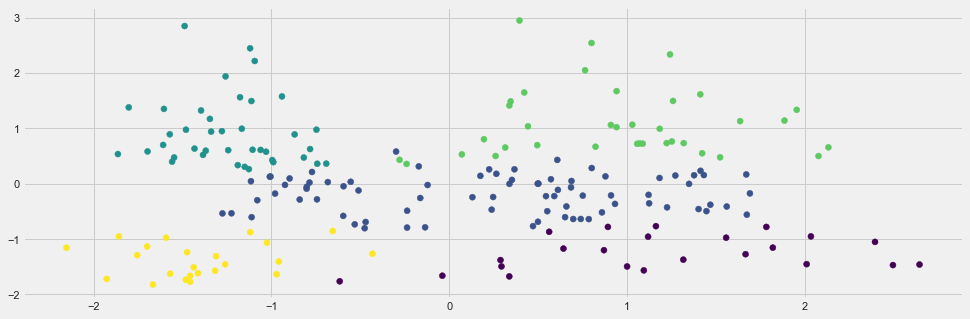

In [76]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data["labels"], cmap="viridis")